In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [3]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [26]:
import numpy as np
import scipy.spatial.distance as ds

for i in range(10):
    max_dis = 0
    num_closed_vector = 0
    for j in range(10):
        if i==j:
            pass
        else:
            dis=ds.cosine(raitings[i], raitings[j])
            if max_dis < dis:
                max_dis = dis
                num_closed_vector = j
            else:
                pass
    print (i, num_closed_vector)
       

0 6
1 7
2 6
3 4
4 3
5 6
6 2
7 2
8 3
9 6


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [29]:
# С помощью PCA
from sklearn.decomposition import PCA
from numpy import transpose

pca = PCA(n_components = 5)
raitings_PCAreduced = pca.fit_transform((raitings))
raitings_PCAreduced

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [30]:
# Для проверки запустим тожде самое, только на сокращенной размерности.
import numpy as np
import scipy.spatial.distance as ds

for i in range(10):
    max_dis = 0
    num_closed_vector = 0
    for j in range(10):
        if i==j:
            pass
        else:
            dis=ds.cosine(raitings_PCAreduced[i], raitings_PCAreduced[j])
            if max_dis < dis:
                max_dis = dis
                num_closed_vector = j
            else:
                pass
    print (i, num_closed_vector)
# Некоторые соотношения X-Y совпадают с полным набором данных. Надо понимать что мы потеряли часть данных при сниженнии размерности 

0 5
1 9
2 6
3 4
4 3
5 0
6 2
7 9
8 3
9 7


### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [4]:
def f(x):
    return np.tan(np.sin(x)+ np.cos(2*x+3))**2

In [5]:
# Первая производная равна
# На бумаге
# 2*(1 + tan(sin(x) + cos(2*x + 3))^2)*(-2*sin(2*x + 3) + cos(x))*tan(sin(x) + cos(2*x + 3))

#Определение точки 
x0=1
# Order of the derivative. Default is 1.
n1=1

from scipy.misc import derivative
# The point at which n-th derivative is found.
f1x =[derivative(f, x0=x0, n=n1, order = n1+2)]
print(f1x)  

[57.06531269460301]


### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [6]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [7]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [8]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

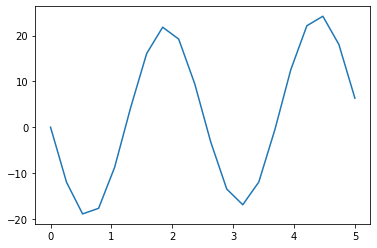

In [9]:
plt.plot(x, fx)

plt.show()

In [10]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [31]:
# Дано Х, Y, и функция f(x, a, b).
# Параметры a,b надо подобрать MAE->min
from scipy.optimize import minimize

# Зададим начальные условия a и b
params = [1,1]
# params[1]
result = minimize(error, params, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)

# a=1.95282585
# b=1.56625208


Optimization terminated successfully.
         Current function value: 228.356720
         Iterations: 109
         Function evaluations: 207
[1.95282585 1.56625208]


### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [56]:
# 
from statistics import mean
from scipy.stats import *
import random
import seaborn

# Создайте собственную дискретную случайную величину с 20 значениями.
n0=20
p0=0.5
# Биномиальное распределение
rv = binom(p, n)
mean, var, _, _ = binom.stats(n0, p0, moments='mvsk')
print(mean, var)

10.0 5.0


Среднее значение равно:9.9929 при размере выборки: 50 и количестве выборок: 1000


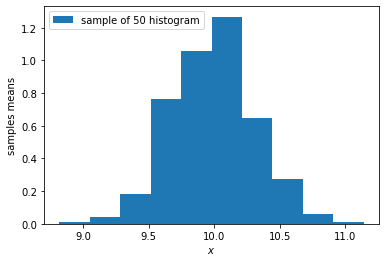

In [67]:
# Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. 
# Постройте гистограмму распределения средних.

#параметры запуска: размеры выборок и количество повторов генерации
n1 = 50
samples_count = 1000
# sample1 = bin.rvs(size=n1)
# rv0 = binom.rvs(n=n0,p=p0,loc=0,size=n1)
# data=
# data
#массивы для сохранения средних по выборкам
a1 = np.array([])

for number in range(samples_count):
    # на каждом цикле генерируем выборки разных размеров
    sample1 = binom.rvs(n=n0,p=p0,loc=0,size=n1)
    mean_i=sum(sample1)/n1#определение выборочного среднего (в.с.)
    # считаем среднее по каждой выборке и добавляем в массив средних
    a1 = np.append(a1, sample1.mean())

    #строим графики
#подписи для графиков
label_1 = 'sample of ' + str(n1) + ' histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')
from statistics import mean 
print(f'Среднее значение равно:{mean(a1)} при размере выборки: {n1} и количестве выборок: {samples_count}')

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [33]:
# На бумаге
# # Собственное значение 
# -1, 3
# # Собственный вектор
u1=[-2, 1]
u2=[2, 1]

# В Python
from scipy import linalg
# Собственные вектора методом NumPy получились другие.
m = np.array([[1, 4],
              [1, 1]])

np.linalg.eig(m)

(array([ 3., -1.]), array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))